<a href="https://colab.research.google.com/github/byrneap23/FinalProject/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
'''
Our coding project is an extension of a simple monte carlo problem that says this:
"The chances of rolling double sixes using 2 standard 6 sided die is a 1/36 chance, or 2.77%. However, if you roll these 2 dice 24 times, the chances of rolling
double sixes goes up to 49.1%. A monte carlo simulation can help approximate this and multiple changes can be made to the game including the number of sides
on the die and the number of rolls in one trial."
'''

'\nOur coding project is an extension of a simple monte carlo problem that says this:\n"The chances of rolling double sixes with only 1 roll of 2 standard 6 sided die is a 1/36 chance, or 2.77%. However, if you roll 2 dice 24 times, the chances of rolling double \nsixes goes up to just shy of 50% (49.1%). A monte carlo simulation can help approximate this and multiple changes can be game including the number of sides on the die and the\nnumber of rolls in one trial."\n'

In [ ]:
'''
In this dice game, a player will be given a percentage that they must get within 1% of. The first numbers they will input will be the numbers that they
want each die to display to be given a 'win' for that trial (easiest choices are doubles of a specific number). There will be 100 total trials run in the simulation.

With the 'game code', the user's first attempt will have them input how many sides will be on each die (ex: standard 6 sided die, d20) with a
number corresponding to each side starting with 1 (1-6 for a standard die, 1-20 for a d20). After inputting the number of sides on the die, the player will input how many rolls
they would like to happen. This is the number of rolls in 1 of the monte carlo trials (i.e. 10 rolls is a total of rolling 2 dice 1000 times).

It will then output the probability that this scenario will happen as seen in the example problem above. The probability will be a ratio of the number
of trials where the two values were rolled out of the total number of trials (that being 100). Over time, the user will be able to change either the number of sides
on the dice or the number of rolls in one trial to get their probability closer to the target (they can technically change both, but we don't recommend that due to the volatility
it creates with their probailities).
'''

In [1]:
import random
import matplotlib.pyplot as plt

In [4]:
# The user is given the probability to achieve within 1%
int_target = random.randint(2, 100)
print(f"Your target percentage to get within 1% of is {int_target}%.")
target = int_target

# User sets fixed target dice values (cannot change later)
d1_value = int(input("Enter what die number you want on the first die (this can't be changed after entered): "))
d2_value = int(input("Enter what die number you want on the second die (this can't be changed after entered): "))

# Fixed number of Monte Carlo trials
numTrials = 100

Your target percentage to get within 1% of is 29%.
Enter what die number you want on the first die (this can't be changed after entered): 6
Enter what die number you want on the second die (this can't be changed after entered): 6



Attempt #1
Please enter the number of sides you would like on the die: 6
Now, enter the total number of rolls you want to happen: 18
The probability you achieved with your inputs was: 45.00%.
Sorry, your probability of 45.00% is not within 1% of the target (29%).
Think of changing either the number of sides or rolls in your next attempt, but maybe not both.

Attempt #2
Please enter the number of sides you would like on the die: 6
Now, enter the total number of rolls you want to happen: 10
The probability you achieved with your inputs was: 24.00%.
Sorry, your probability of 24.00% is not within 1% of the target (29%).
Think of changing either the number of sides or rolls in your next attempt, but maybe not both.

Attempt #3
Please enter the number of sides you would like on the die: 6
Now, enter the total number of rolls you want to happen: 11
The probability you achieved with your inputs was: 26.00%.
Sorry, your probability of 26.00% is not within 1% of the target (29%).
Think of chan

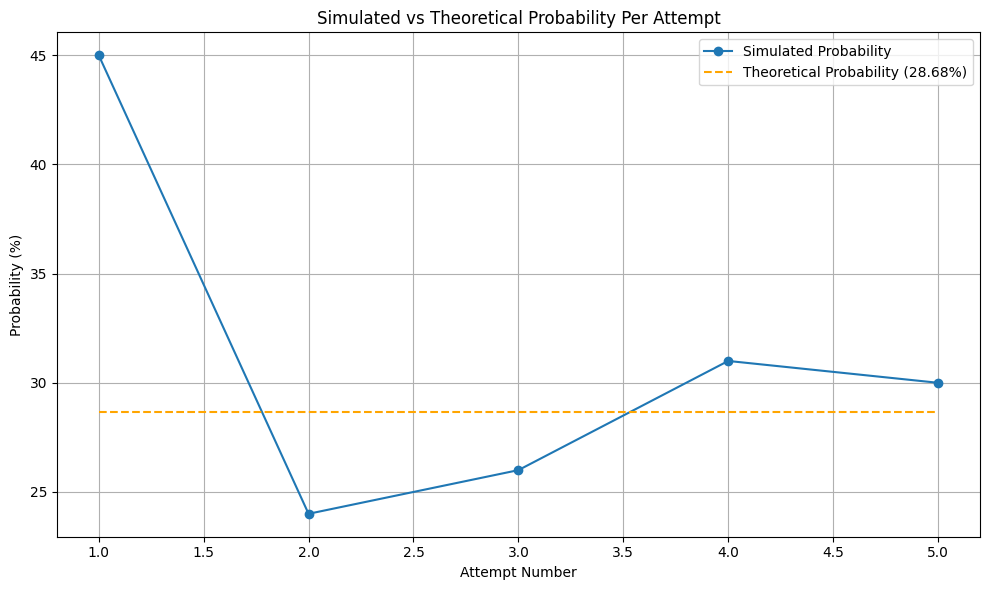

In [5]:
# Die rolling function (sides passed in)
def rollDie(sides):
    return random.randint(1, sides)

# Simulation function
def MonteProb(rolls, d1_value, d2_value, sides):
    numwins = 0.0
    for i in range(numTrials):
        for j in range(rolls):
            d1 = rollDie(sides)
            d2 = rollDie(sides)
            if d1 == d1_value and d2 == d2_value:
                numwins += 1
                break
    prob = (numwins / numTrials) * 100
    return prob

# Track attempt number and probabilities
attempt = 1
prob_history = []

# Loop until success
while True:
    print(f"\nAttempt #{attempt}")
    sides = int(input("Please enter the number of sides you would like on the die (must be >= value): "))
    rolls = int(input("Now, enter the total number of rolls you want to happen: "))

    prob = MonteProb(rolls, d1_value, d2_value, sides)
    prob_history.append(prob)

    print(f"The probability you achieved with your inputs was: {prob:.2f}%.")

    if abs(prob - target) <= 1:
        print(f"Congrats! Your probability of {prob:.2f}% is within 1% of the target ({target}%)!")
        break
    else:
        print(f"Sorry, your probability of {prob:.2f}% is not within 1% of the target ({target}%).")
        print("Think of changing either the number of sides or rolls in your next attempt, but maybe not both.")
        attempt += 1

# Line graph showing simulated probability vs expected probability
actual_prob_per_trial = (1 - (1 - (1 / sides**2)) ** rolls) * 100
actual_probs = [actual_prob_per_trial] * attempt  # flat line for comparison

plt.figure(figsize=(10, 6))
plt.plot(range(1, attempt + 1), prob_history, marker='o', label="Simulated Probability")
plt.plot(range(1, attempt + 1), actual_probs, linestyle='--', color='orange', label=f"Theoretical Probability ({actual_prob_per_trial:.2f}%)")

plt.title("Simulated vs Theoretical Probability Per Attempt")
plt.xlabel("Attempt Number")
plt.ylabel("Probability (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [1]:
# Line graph for plotting probabilities until success
plt.figure(figsize=(10, 6))
plt.plot(range(1, attempt + 1), prob_history, marker='o', label="Your Probabilities")
plt.axhline(y=target, color='green', linestyle='--', label=f"Target ({target}%)")
plt.fill_between(range(1, attempt + 1), target - 1, target + 1, color='green', alpha=0.1, label="±1% Range")

plt.title("Probability Attempts vs Target")
plt.xlabel("Attempt Number")
plt.ylabel("Achieved Probability (%)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined